**ZEVI ASSIGNMENT**

REEVE KALE - FINAL YEAR MSC.BIG DATA ANALYTICS

# **TWEETS ON SWIGGY - SENTIMENT ANALYSIS**

**The purpose of this study is to analyze the tweets in the name of swiggy given by customers on twitters through our twitter tweets dataset. As customers/agents tweet regarding the service of Swiggy or giving feedback of food or complaints. So I will remove out the sentiment of the tweets and check the distribution of postive/neutral/negative tweets.**

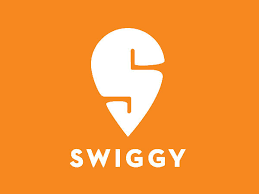

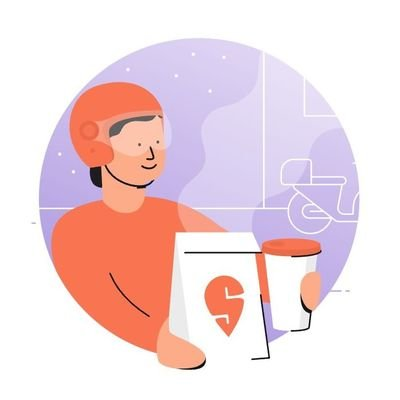

In [ ]:
!git clone https://github.com/reeve-k-15/Zevi_AssignmentRK

Cloning into 'Zevi_AssignmentRK'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (6/6), done.


In [ ]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#load the dataset
df = pd.read_excel('/content/Zevi_AssignmentRK/Swiggy Dataset.xlsx')

In [ ]:
#to be able to view all the records in the dataframe mentioned
pd.set_option('display.max_columns', None)

In [ ]:
df.head(5)

,date,favorite_count,followers_count,friends_count,full_text,retweet_count,retweeted,screen_name,tweet_id,user_id
0,7/18/2019 22:47,0.0,82.0,219.0,@Mahi_2510 @swiggy_in The ultimate answer will...,0.0,0.0,syamantak1,1.0,6.195942e+07
1,7/18/2019 22:43,0.0,102.0,129.0,@SwiggyCares I hope so.,0.0,0.0,Bharatbbhushn,2.0,1.432844e+08
2,7/18/2019 22:37,0.0,102.0,129.0,@SwiggyCares I think you have the order detail...,0.0,0.0,Bharatbbhushn,3.0,1.432844e+08
3,7/18/2019 22:35,0.0,13.0,16.0,"@swiggy_in People are complaining here also, i...",0.0,0.0,taifkhalid01,4.0,8.303400e+17
4,7/18/2019 22:25,0.0,102.0,129.0,@SwiggyCares Do you even know the meaning of y...,0.0,0.0,Bharatbbhushn,5.0,1.432844e+08


# **EXPLORATORY DATA ANALYSIS**

In [ ]:
print(df.shape[0],' ROWS')
print(df.shape[1],' COLUMNS')

16712  ROWS
10  COLUMNS


In [ ]:
df.isnull().sum()

date                  0
favorite_count        0
followers_count       0
friends_count         0
full_text             0
retweet_count         0
retweeted          2328
screen_name           0
tweet_id              0
user_id               0
dtype: int64

In [ ]:
df['retweeted'].value_counts()

0.0    14384
Name: retweeted, dtype: int64

since nobody retweeted, there's no use keeping it also

In [ ]:
df = df.drop(['retweeted'],axis=1)

In [ ]:
df = df.drop(['tweet_id', 'user_id'], axis = 1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16712 entries, 0 to 16711
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             16712 non-null  object 
 1   favorite_count   16712 non-null  float64
 2   followers_count  16712 non-null  float64
 3   friends_count    16712 non-null  float64
 4   full_text        16712 non-null  object 
 5   retweet_count    16712 non-null  float64
 6   screen_name      16712 non-null  object 
dtypes: float64(4), object(3)
memory usage: 914.1+ KB


In [ ]:
#convert date time to a proper format for better analysis
df['date'] = df['date'].apply(pd.to_datetime) 

In [ ]:
# no need to remove for the Year a new column because the tweets exists from none other than 2019 itself, so it is understood
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['weekday'] = df['date'].dt.weekday

In [ ]:
df.head(3)

,date,favorite_count,followers_count,friends_count,full_text,retweet_count,screen_name,month,day,weekday
0,2019-07-18 22:47:00,0.0,82.0,219.0,@Mahi_2510 @swiggy_in The ultimate answer will...,0.0,syamantak1,7,18,3
1,2019-07-18 22:43:00,0.0,102.0,129.0,@SwiggyCares I hope so.,0.0,Bharatbbhushn,7,18,3
2,2019-07-18 22:37:00,0.0,102.0,129.0,@SwiggyCares I think you have the order detail...,0.0,Bharatbbhushn,7,18,3


In [ ]:
df.loc[df["month"] ==  1, "month"] = 'January'
df.loc[df["month"] ==  2, "month"] = 'February'
df.loc[df["month"] ==  3, "month"] = 'March'
df.loc[df["month"] ==  4, "month"] = 'April'
df.loc[df["month"] ==  5, "month"] = 'May'
df.loc[df["month"] ==  6, "month"] = 'June'
df.loc[df["month"] ==  7, "month"] = 'July'
df.loc[df["month"] ==  8, "month"] = 'August'
df.loc[df["month"] ==  9, "month"] = 'September'
df.loc[df["month"] ==  10, "month"] = 'October'
df.loc[df["month"] ==  11, "month"] = 'November'
df.loc[df["month"] ==  12, "month"] = 'December'

In [ ]:
df.loc[df["weekday"] ==  0, "weekday"] = 'Monday'
df.loc[df["weekday"] ==  1, "weekday"] = 'Tuesday'
df.loc[df["weekday"] ==  2, "weekday"] = 'Wednesday'
df.loc[df["weekday"] ==  3, "weekday"] = 'Thursday'
df.loc[df["weekday"] ==  4, "weekday"] = 'Friday'
df.loc[df["weekday"] ==  5, "weekday"] = 'Saturday'
df.loc[df["weekday"] ==  6, "weekday"] = 'Sunday'

In [ ]:
df['date'] = df['date'].dt.date

In [ ]:
df

,date,favorite_count,followers_count,friends_count,full_text,retweet_count,screen_name,month,day,weekday
0,2019-07-18,0.0,82.0,219.0,@Mahi_2510 @swiggy_in The ultimate answer will...,0.0,syamantak1,July,18,Thursday
1,2019-07-18,0.0,102.0,129.0,@SwiggyCares I hope so.,0.0,Bharatbbhushn,July,18,Thursday
2,2019-07-18,0.0,102.0,129.0,@SwiggyCares I think you have the order detail...,0.0,Bharatbbhushn,July,18,Thursday
3,2019-07-18,0.0,13.0,16.0,"@swiggy_in People are complaining here also, i...",0.0,taifkhalid01,July,18,Thursday
4,2019-07-18,0.0,102.0,129.0,@SwiggyCares Do you even know the meaning of y...,0.0,Bharatbbhushn,July,18,Thursday
...,...,...,...,...,...,...,...,...,...,...
16707,2019-11-07,0.0,0.0,2.0,@SwiggyCares they said as delivery box is not ...,0.0,UmmeMohammad18,November,7,Thursday
16708,2019-11-07,0.0,106.0,146.0,"@swiggy_in Deliver to karta nahi, install kyo ...",0.0,Desi_Life1,November,7,Thursday
16709,2019-11-07,0.0,91.0,248.0,@swiggy_in thanks for spilling my drink. I wai...,0.0,Pinks_Forever_,November,7,Thursday
16710,2019-11-07,0.0,0.0,2.0,@SwiggyCares hello there i use swigggy regular...,0.0,UmmeMohammad18,November,7,Thursday


In [ ]:
import plotly.express as px
data = df['weekday']
px.histogram(data)

WEDNESDAY, THURSDAY, FRIDAY AND SUNDAY HAVE A COUNT OF MORE THAN 2500, that show them tweeting that much more lively on those days

In [ ]:
import plotly.express as px
px.histogram(df['month'])

JUNE has the highest amount of tweets
because,
In early 2019, Swiggy expanded into general product deliveries under the name Swiggy Stores, sourcing items from local stores
By September 2019, Swiggy launched instant pickup/dropoff service Swiggy Go. The service is used for a diverse array of items, including laundry and document or parcel deliveries to business clients and retail customers.
With added advertisements, Swiggy caught the public eye

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



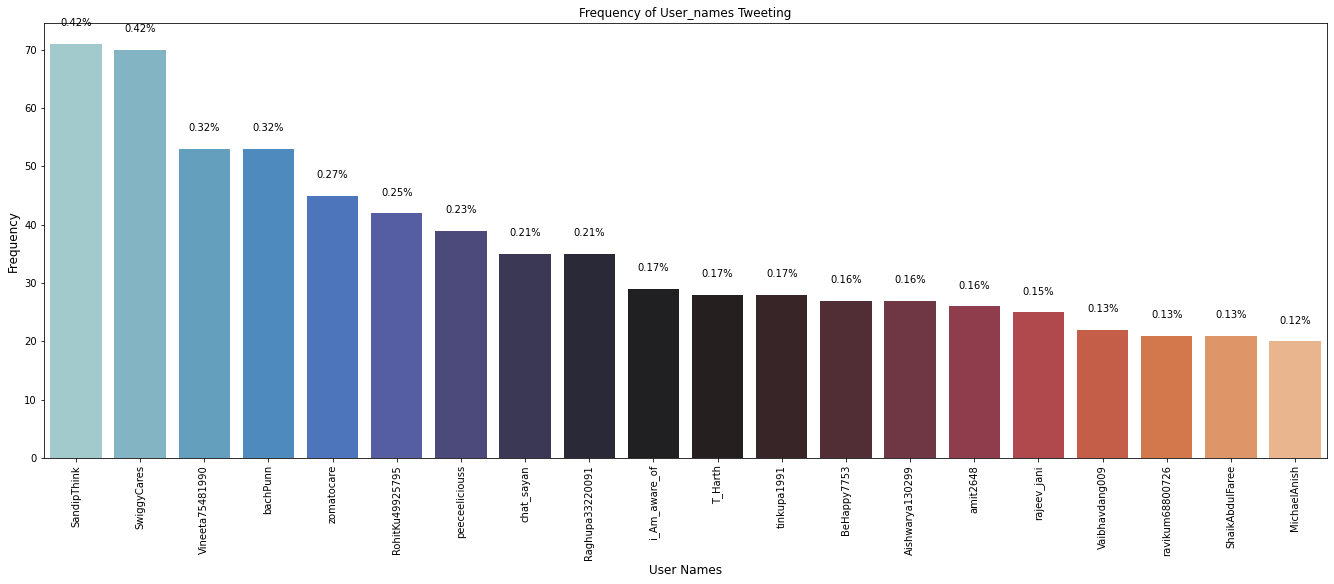

In [ ]:
def plot_frequency_charts(df, feature, title, pallete):
    freq_df = pd.DataFrame()
    freq_df[feature] = df[feature]
    
    f, ax = plt.subplots(1,1, figsize=(23,8))
    total = float(len(df))
    g = sns.countplot(df[feature], order = df[feature].value_counts().index[:20], palette=pallete)
    g.set_title("Number and percentage of {}".format(title))

    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 

    plt.title('Frequency of User_names Tweeting')
    plt.ylabel('Frequency', fontsize=12)
    plt.xlabel(title, fontsize=12)
    plt.xticks(rotation=90)
    plt.show()

plot_frequency_charts(df, 'screen_name', 'User Names','icefire')

In [ ]:
df['Text_length'] = df.full_text.str.split().str.len()

fig = px.histogram(df, x = 'Text_length', marginal = 'box',
                    title = 'Distribution of length of a tweet', 
                   color_discrete_sequence=['#FC3000'],
                   nbins = 100)

fig.show()

# **SENTIMENT ANALYSIS**

In [ ]:
df2 = pd.read_excel('/content/Zevi_AssignmentRK/Swiggy Dataset.xlsx')
sentim = df2[['full_text', 'user_id']]
sentim.head()

,full_text,user_id
0,@Mahi_2510 @swiggy_in The ultimate answer will...,6.195942e+07
1,@SwiggyCares I hope so.,1.432844e+08
2,@SwiggyCares I think you have the order detail...,1.432844e+08
3,"@swiggy_in People are complaining here also, i...",8.303400e+17
4,@SwiggyCares Do you even know the meaning of y...,1.432844e+08


In [ ]:
import string
string.punctuation      # it contains pre-defined punctuations like  ‘!”#$%&'()*+,-./:;?@[\]^_`{|}~’

def remove_punctuation(text):
  punctuationfree= "".join([i for i in text if i not in string.punctuation])
  return punctuationfree


sentim['full_text'] = sentim['full_text'].apply(lambda x: remove_punctuation(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# to remove emojis
import re

def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'', text)

sentim['full_text'] = sentim['full_text'].apply(deEmojify)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
sentim['full_text'] = sentim['full_text'].apply(lambda x: x.lower())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
def tokenization(text):
  tokens = re.split('\W+', text)
  return tokens

sentim['full_text']= sentim['full_text'].apply(lambda x: tokenization(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
import nltk
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')

def remove_stopwords(text):
  output = [i for i in text if i not in stopwords]
  return output

sentim['full_text']= sentim['full_text'].apply(lambda x:remove_stopwords(x))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
from nltk.stem.porter import PorterStemmer
porter_stemmer = PorterStemmer()

def stemming(text):
    stem_text = [porter_stemmer.stem(word) for word in text]
    return stem_text

sentim['full_text'] = sentim['full_text'].apply(lambda x: stemming(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatizer(text):
    lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
    return lemm_text


sentim['full_text'] = sentim['full_text'].apply(lambda x:lemmatizer(x))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 5.1 MB/s 


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sid= SentimentIntensityAnalyzer()

sentim['full_text'] = sentim['full_text'].apply(', '.join)    # list to string

sentim['score'] = sentim['full_text'].apply(lambda txt: sid.polarity_scores(txt))
sentim['compound'] = sentim['score'].apply(lambda txt: txt['compound'])

def polarity_score(compound):   # condition for Pos, Neg, Neu
    if compound > 0.05:
        return "positive"
    elif compound < -0.5:
        return "negative"
    elif compound >= -0.05 and compound < 0.05:
        return "neutral"

sentim['Analysis'] = sentim['compound'].apply(lambda val: polarity_score(val))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [ ]:
sentim.head(3)

,full_text,user_id,score,compound,Analysis
0,"mahi2510, swiggyin, ultim, answer, b, sorri, a...",61959419.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
1,"swiggycar, hope",143284383.0,"{'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'comp...",0.4404,positive
2,"swiggycar, think, order, detail, number, prese...",143284383.0,"{'neg': 0.0, 'neu': 0.86, 'pos': 0.14, 'compou...",0.0772,positive


In [ ]:
sentim['Analysis'].value_counts()

positive    6051
neutral     5568
negative    2202
Name: Analysis, dtype: int64

In [ ]:
import plotly.graph_objects as go

labels = ['positive','negative','neutral']
values = [6051, 5568, 2202]

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.show()

# **WORDCLOUD**

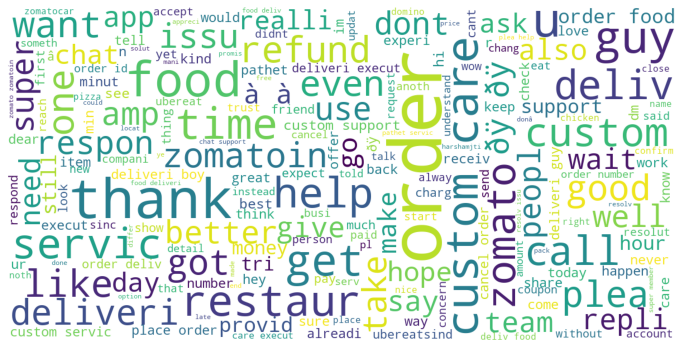

In [ ]:
from wordcloud import WordCloud
from nltk.corpus import stopwords

def create_wordcloud(text):    
    allWords = ' '.join([tweets for tweets in text])
    STOPWORDS=[]
    stopwords = set(STOPWORDS)
    stopwords.update(["SwiggyCare","swiggi","swiggycar","swiggyin","SwiggyCares","swiggy_in","swiggy"])
    wordCloud = WordCloud(background_color='white', stopwords=stopwords, width=1200, height=600, random_state=23, max_font_size=130).generate(allWords)
    plt.figure(figsize= (12,8))
    plt.imshow(wordCloud)
    plt.axis('off')
    plt.show()

#wordcloud for positive tweets
posTweets = sentim.loc[sentim['Analysis']=='positive', 'full_text']
create_wordcloud(posTweets)

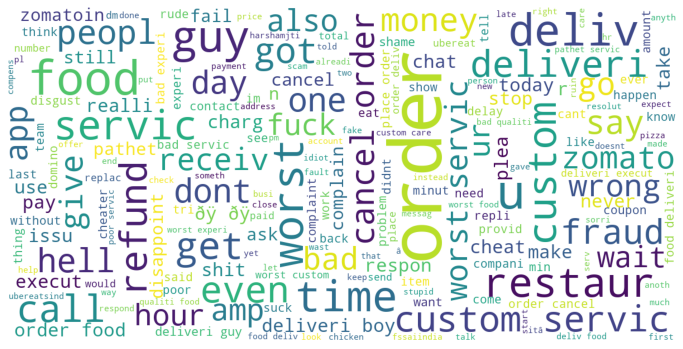

In [ ]:
negTweets = sentim.loc[sentim['Analysis']=='negative', 'full_text']
create_wordcloud(negTweets)

# **CLUSTERING**

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(sentim['full_text']) 

In [ ]:
pca = PCA(n_components=2)
pca_matrix = pca.fit_transform(tfidf_matrix.A)

In [ ]:
dff = pd.DataFrame(pca_matrix)
dff.columns = ['pc1', 'pc2']

In [ ]:
df3 = dff.join(sentim['Analysis'])
df3

,pc1,pc2,Analysis
0,0.051546,-0.017026,neutral
1,0.084270,-0.113545,positive
2,-0.022145,-0.043456,positive
3,-0.033599,-0.002738,None
4,0.067830,-0.126888,None
...,...,...,...
16707,-0.178633,0.085268,negative
16708,0.021122,0.012561,neutral
16709,0.046753,-0.040853,None
16710,-0.150466,0.054327,neutral


In [ ]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(tfidf_matrix)

KMeans(n_clusters=3)

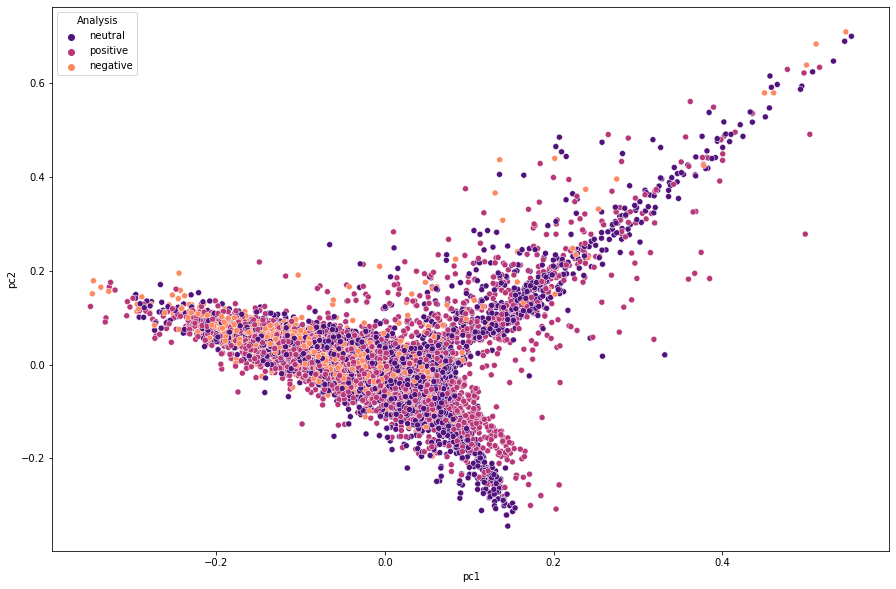

In [ ]:
plt.figure(figsize=(15, 10))
sns.scatterplot(data = df3, x= 'pc1', y= 'pc2' , hue= 'Analysis' , palette = 'magma');